![picture](https://insulinicfl.com/wp-content/uploads/2023/01/diabetes-complications-min-720x720.png)

**<font size=4>Description:</font>**

**<font size=2>This project utilizes Markov modeling and Monte Carlo simulation to project long-term clinical outcomes, costs, and quality-adjusted life years (QALYs) for patients with Type 1 and Type 2 diabetes. A simulated dataset, reflecting real-world patient characteristics, was analyzed to assess the impact of diabetic complications, including nephropathy, retinopathy, and cardiovascular disease, on life expectancy and healthcare costs. Results demonstrate that early intervention, particularly combining medication (e.g., Metformin) with lifestyle adjustments, enhances both life expectancy and QALYs while reducing long-term costs. Comparisons of treatment scenarios underscore the importance of personalized diabetes management, with preventive care yielding better patient outcomes and cost-effectiveness. These findings highlight the value of integrated treatment approaches in improving patient quality of life and optimizing healthcare resource utilization.</font>**


**Dataset source link**: Simulated Datasets

**MARKOV MODEL & MONTE CARLO SIMULATION ANALYSIS ON CORE DIABETES SIMULATED DATASETS**

Let's start with the Python code for Exploratory Data Analysis (EDA) and then move on to Projecting Long-term Clinical Outcomes. We’ll import the necessary libraries, load the dataset, and begin by exploring key features related to diabetes-related complications, life expectancy, and QALYs.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Let's start with the Python code for Exploratory Data Analysis (EDA) and then move on to Projecting Long-term Clinical Outcomes. We’ll import the necessary libraries, load the dataset, and begin by exploring key features related to diabetes-related complications, life expectancy, and QALYs.

In [2]:
# Load the dataset

df = pd.read_csv("/kaggle/input/diabetes/diabetess.csv")

In [3]:
#This will show the top rows about the dataset

df.head()

,Patient_ID,Age,Gender,Duration_of_Diabetes,HbA1c (%),Blood_Pressure (SBP mmHg),Total_Cholesterol (mg/dL),LDL (mg/dL),HDL (mg/dL),BMI,...,Insulin_Use,Kidney_Function (eGFR),Retinopathy_Status,Medication_Adherence (%),Physical_Activity_Level,Neuropathy_Presence,Microvascular_Complications,Macrovascular_Events,Disutility_Other_Complications,Follow_up_Frequency (per year)
0,1,30,Female,28,9.1,157,232,127,31,22.5,...,Yes,51,Yes,77.8,High,Yes,No,NaN,0.150,1
1,2,56,Male,27,9.0,135,208,93,46,27.8,...,Yes,70,No,92.5,High,No,No,Stroke,0.114,4
2,3,55,Male,15,6.3,150,238,86,70,24.8,...,Yes,53,No,66.5,Low,Yes,No,Stroke,0.110,5
3,4,36,Female,19,5.6,137,186,117,72,26.7,...,No,109,No,91.5,High,Yes,Yes,Stroke,0.039,3
4,5,84,Female,11,6.1,128,231,192,78,31.9,...,No,92,Yes,58.1,Moderate,No,No,Heart Disease,0.233,5


**Projecting Long-term Clinical Outcomes**

Now, let’s project diabetes-related complications, life expectancy, and QALYs using the available data:

In [4]:
# Projecting Long-term Clinical Outcomes

# Categorizing Diabetes-related Complications
complications = ['Baseline_Complications', 'Neuropathy_Presence', 'Retinopathy_Status', 'Kidney_Function (eGFR)', 'Microvascular_Complications', 'Macrovascular_Events']


In [5]:
# Count of patients with each complication
for comp in complications:
    print(f"{comp} Count:\n", df[comp].value_counts(), "\n")

Baseline_Complications Count:
 Baseline_Complications
Nephropathy    416
CVD            411
Neuropathy     383
Retinopathy    371
Name: count, dtype: int64 

Neuropathy_Presence Count:
 Neuropathy_Presence
Yes    1000
No     1000
Name: count, dtype: int64 

Retinopathy_Status Count:
 Retinopathy_Status
No     1044
Yes     956
Name: count, dtype: int64 

Kidney_Function (eGFR) Count:
 Kidney_Function (eGFR)
113    31
29     31
92     30
26     29
81     28
       ..
33     12
79     12
72     11
95     11
23     10
Name: count, Length: 105, dtype: int64 

Microvascular_Complications Count:
 Microvascular_Complications
No     1008
Yes     992
Name: count, dtype: int64 

Macrovascular_Events Count:
 Macrovascular_Events
Heart Disease    692
Stroke           668
Name: count, dtype: int64 



The results highlight the prevalence of various diabetes-related complications within the dataset. Nephropathy is the most common complication, affecting 416 patients, followed closely by Cardiovascular Disease (CVD) with 411 patients. Neuropathy and Retinopathy also affect a significant portion of the population, with 383 and 371 cases, respectively. Neuropathy is present in 50% of patients, while Retinopathy affects 47.8%, stressing the need for managing these complications.

Kidney function varies widely, with some patients showing reduced kidney performance, indicated by lower eGFR values. The dataset also shows an even split in microvascular complications, with 49.6% of patients affected. Macrovascular events, including heart disease (692 patients) and stroke (668 patients), are common and require careful cardiovascular risk management.

In summary, chronic complications like Nephropathy, CVD, and microvascular issues are widespread in this population, emphasizing the need for comprehensive diabetes management, including regular screenings and proactive treatment to improve patient outcomes.



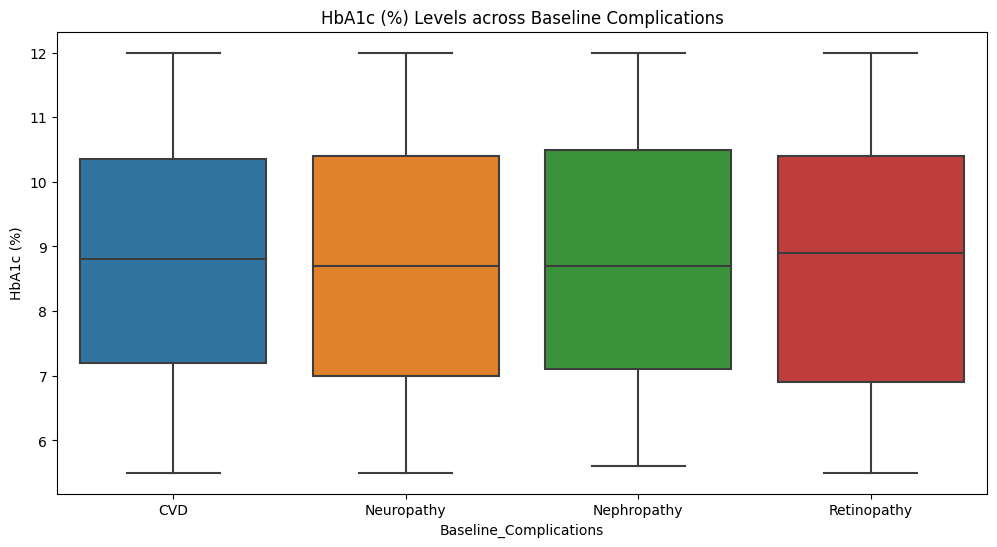

In [6]:
# Hypothesis: Higher HbA1c leads to more complications, worse QALYs, and lower life expectancy
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Baseline_Complications', y='HbA1c (%)')
plt.title('HbA1c (%) Levels across Baseline Complications')
plt.show()

The box plot shows the distribution of HbA1c levels among patients with various diabetes-related complications: Cardiovascular Disease (CVD), Neuropathy, Nephropathy, and Retinopathy.

    The median HbA1c level for all groups is around 9%, indicating generally elevated blood sugar levels in patients with these complications.
    
    The interquartile range (IQR) shows a similar spread across all complications, with HbA1c levels mostly falling between 7% and 10%.
    
    The whiskers extend from about 6% to 12%, showing the range of HbA1c levels excluding outliers, which is consistent across complications.
    
    There are no significant differences in HbA1c levels among patients with different complications, suggesting uniformly poor blood sugar control.

Key insights: Patients with CVD, Neuropathy, Nephropathy, and Retinopathy all show suboptimal glycemic control, with HbA1c levels above the recommended target of 7%, underscoring the need for improved diabetes management to prevent or slow the progression of complications.

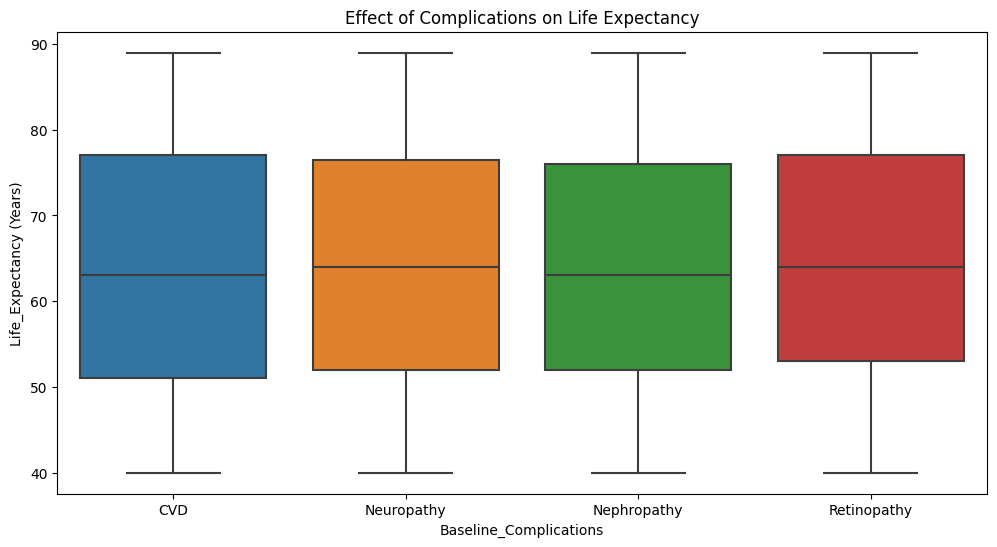

In [7]:
# Effect of complications on life expectancy
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Baseline_Complications', y='Life_Expectancy (Years)')
plt.title('Effect of Complications on Life Expectancy')
plt.show()

The box plot displays the distribution of life expectancy for patients with baseline complications like Cardiovascular Disease (CVD), Neuropathy, Nephropathy, and Retinopathy.

    The median life expectancy across all groups is around 60-65 years, suggesting similar life expectancies regardless of the complication type.
    
    The interquartile range (IQR) shows that life expectancy for most patients lies between 50 and 80 years, with CVD and Nephropathy showing a wider range, while Neuropathy and Retinopathy have a slightly narrower spread.
    
    The whiskers indicate a full range of life expectancy from 40 to 90 years, with some patients managing to live longer even with complications.

Key Insights: Complications such as CVD, neuropathy, nephropathy, and retinopathy are associated with reduced life expectancy, though individual outcomes vary significantly. The wide range of life expectancy emphasizes the importance of effective management and personalized care, as many patients can still achieve a relatively long lifespan despite these complications.

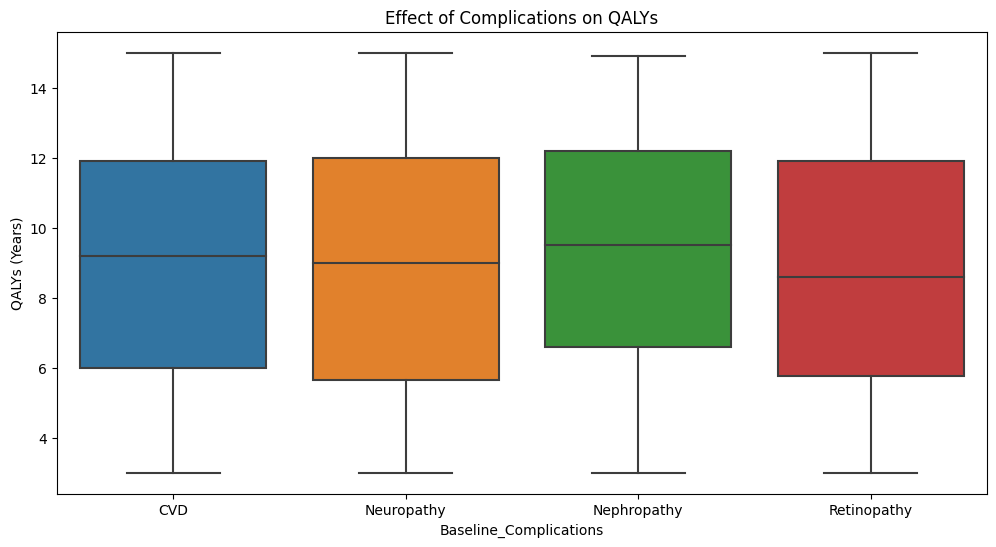

In [8]:
# Effect of complications on QALYs
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Baseline_Complications', y='QALYs (Years)')
plt.title('Effect of Complications on QALYs')
plt.show()

The box plot shows the distribution of Quality-Adjusted Life Years (QALYs) for patients with complications like Cardiovascular Disease (CVD), Neuropathy, Nephropathy, and Retinopathy.

    The median QALYs for all groups are around 9 to 10 years, indicating a similar quality of life and life expectancy across the complications.
    
    The interquartile range (IQR) shows that most patients have QALYs between 8 and 12 years, reflecting a moderate quality of life over their lifespan, regardless of the complication type.
    
    The whiskers reveal a wide range of QALYs (from 4 to 15 years), indicating significant variability in patient experiences within each group.

Patients with CVD and Nephropathy show a broader range of QALYs, suggesting more variability in their quality of life, while Retinopathy patients may have slightly lower median QALYs.

Key insight: All complication groups experience reduced QALYs, but managing these conditions could help improve both life expectancy and quality of life across diabetic patients.

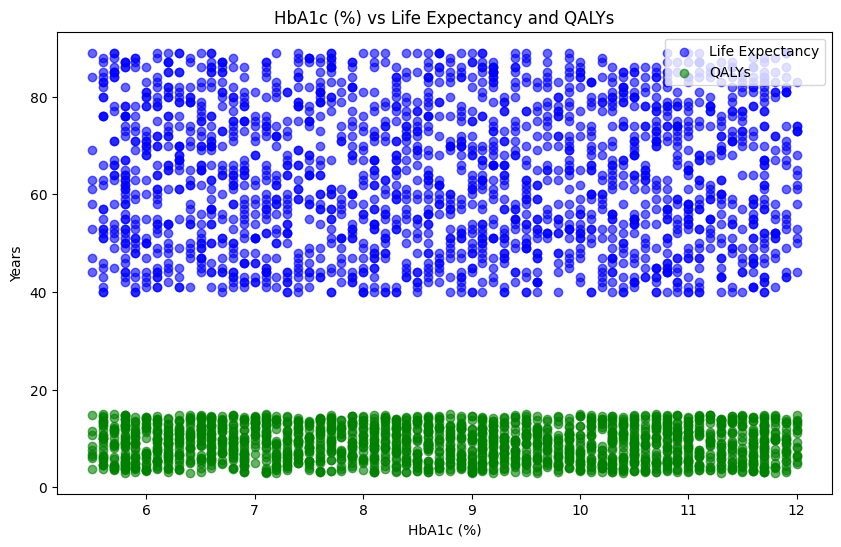

In [9]:
# Scatter plot showing relationship between HbA1c, Life Expectancy, and QALYs
plt.figure(figsize=(10, 6))
plt.scatter(df['HbA1c (%)'], df['Life_Expectancy (Years)'], c='blue', label='Life Expectancy', alpha=0.6)
plt.scatter(df['HbA1c (%)'], df['QALYs (Years)'], c='green', label='QALYs', alpha=0.6)
plt.title('HbA1c (%) vs Life Expectancy and QALYs')
plt.xlabel('HbA1c (%)')
plt.ylabel('Years')
plt.legend()
plt.show()

The scatter plot illustrates the relationship between HbA1c levels and two outcomes: Life Expectancy (blue dots) and Quality-Adjusted Life Years (QALYs) (green dots).

    Life Expectancy (Blue Dots): Life expectancy ranges from 40 to 90 years across various HbA1c levels. There is no clear trend linking higher HbA1c (poorer control) to lower life expectancy. This suggests that factors beyond HbA1c, such as age, complications, or treatment, influence life expectancy.

    QALYs (Green Dots): QALYs, ranging from 0 to 20 years, also show no strong correlation with HbA1c. Similar to life expectancy, QALYs are scattered across all HbA1c levels, indicating that glycemic control alone may not significantly determine quality-adjusted life expectancy.

Key Insights: The lack of a clear downward trend in both outcomes implies that HbA1c is not the sole determinant of life expectancy or QALYs. Holistic diabetes management, addressing lifestyle, complications, and other health factors, is essential to improve long-term outcomes.

In [10]:
# Estimating the average life expectancy and QALYs for patients with complications
avg_life_expectancy_complications = df.groupby('Baseline_Complications')['Life_Expectancy (Years)'].mean()
avg_qalys_complications = df.groupby('Baseline_Complications')['QALYs (Years)'].mean()

print("Average Life Expectancy based on complications:\n", avg_life_expectancy_complications)
print("Average QALYs based on complications:\n", avg_qalys_complications)

Average Life Expectancy based on complications:
 Baseline_Complications
CVD            63.754258
Nephropathy    63.598558
Neuropathy     63.986945
Retinopathy    64.474394
Name: Life_Expectancy (Years), dtype: float64
Average QALYs based on complications:
 Baseline_Complications
CVD            8.996594
Nephropathy    9.231250
Neuropathy     8.902089
Retinopathy    8.869003
Name: QALYs (Years), dtype: float64


The results show that average life expectancy for patients with diabetes-related complications—CVD (63.75 years), Nephropathy (63.60 years), Neuropathy (63.99 years), and Retinopathy (64.47 years)—are relatively similar, ranging from 63 to 64.5 years. Retinopathy patients have the highest life expectancy, while Nephropathy patients have the lowest, but the differences are minimal.

In terms of Quality-Adjusted Life Years (QALYs), Nephropathy patients have the highest QALYs at 9.23, indicating better quality of life despite a slightly lower life expectancy. Retinopathy and Neuropathy patients have the lowest QALYs (8.87 and 8.90), reflecting a modest reduction in quality of life compared to other groups.

Overall, the variations in life expectancy and QALYs between complication groups are minor, suggesting that while these complications affect life expectancy and quality of life, they do so in a similar manner. Managing both length and quality of life is essential in treating diabetes-related complications.

***Costs***

	Direct medical costs: These include costs related to diabetes treatments (insulin, metformin), hospital visits, and management of complications.
    
	Indirect costs: These are costs related to productivity loss or other non-medical expenses caused by diabetes complications.

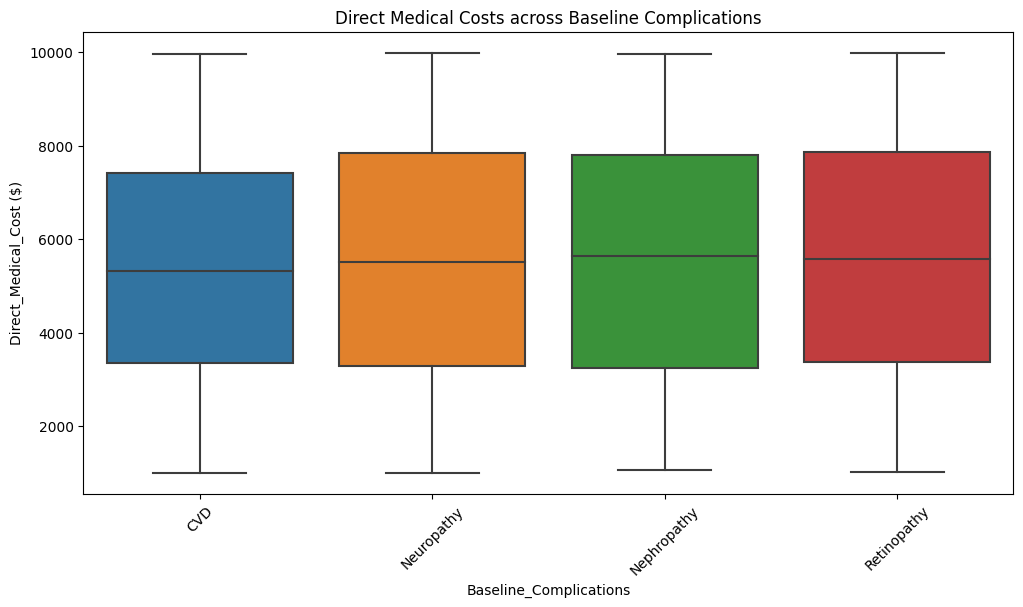

In [11]:
# Boxplot to compare Direct Medical Costs across Baseline Complications
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Baseline_Complications', y='Direct_Medical_Cost ($)')
plt.title('Direct Medical Costs across Baseline Complications')
plt.xticks(rotation=45)
plt.show()

The box plot shows the distribution of direct medical costs for patients with Cardiovascular Disease (CVD), Neuropathy, Nephropathy, and Retinopathy.

    The median costs are fairly consistent, ranging from $6000 for CVD and Neuropathy to $6200 for Nephropathy and Retinopathy. This indicates similar central tendencies in medical expenses across these complications.

    The interquartile range (IQR), where most patients fall, spans from $4000 to $8000, showing that the majority of patients incur comparable costs regardless of their specific complication.

    Whiskers (the range excluding outliers) show costs ranging from $2000 to $10,000, suggesting that while most patients have similar costs, some outliers face significantly higher expenses.

    Nephropathy and Retinopathy tend to have slightly higher median costs, possibly due to more intensive treatments like dialysis or surgeries.

Overall, the plot highlights the substantial financial burden of managing diabetes complications, with Nephropathy and Retinopathy posing slightly higher costs than CVD or Neuropathy.

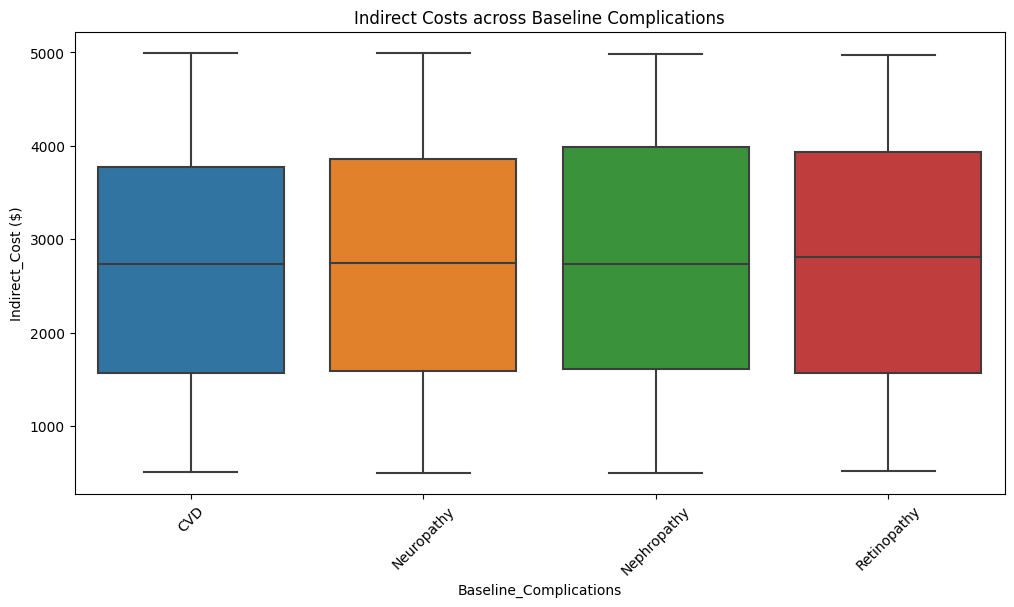

In [12]:
# Boxplot to compare Indirect Costs across Baseline Complications
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Baseline_Complications', y='Indirect_Cost ($)')
plt.title('Indirect Costs across Baseline Complications')
plt.xticks(rotation=45)
plt.show()

The box plot illustrates the indirect costs associated with Cardiovascular Disease (CVD), Neuropathy, Nephropathy, and Retinopathy in diabetic patients.

    The median indirect costs are fairly consistent, ranging from $3000 for CVD and Neuropathy to $3200 for Nephropathy and Retinopathy. This suggests similar economic burdens across complications.

    The interquartile range (IQR) shows most patients incurring indirect costs between $2000 and $4000, regardless of the complication.

    Whiskers reveal a broader range, with minimum costs around $0 to $1000 and maximum costs extending to $5000, indicating that some patients experience significantly higher indirect costs due to severe complications.

    Nephropathy and Retinopathy incur slightly higher median indirect costs, possibly due to factors such as long-term disability and reduced work capacity.

Overall, indirect costs are substantial across complications, primarily reflecting lost productivity and caregiving expenses, with Nephropathy and Retinopathy leading to marginally higher costs compared to CVD and Neuropathy.

In [13]:
# Average costs by complications
avg_direct_costs = df.groupby('Baseline_Complications')['Direct_Medical_Cost ($)'].mean()
avg_indirect_costs = df.groupby('Baseline_Complications')['Indirect_Cost ($)'].mean()

print("Average Direct Medical Costs based on complications:\n", avg_direct_costs)

print("----------------------------------------")

print("Average Indirect Costs based on complications:\n", avg_indirect_costs)

Average Direct Medical Costs based on complications:
 Baseline_Complications
CVD            5430.863747
Nephropathy    5541.483173
Neuropathy     5518.736292
Retinopathy    5592.913747
Name: Direct_Medical_Cost ($), dtype: float64
----------------------------------------
Average Indirect Costs based on complications:
 Baseline_Complications
CVD            2705.017032
Nephropathy    2771.067308
Neuropathy     2732.498695
Retinopathy    2744.574124
Name: Indirect_Cost ($), dtype: float64


The results show that average direct medical costs for diabetes-related complications are similar across conditions, with costs ranging from $5,430 (CVD) to $5,593 (Retinopathy). Retinopathy incurs the highest cost, while CVD has the lowest. This suggests that all complications require substantial medical resources, but Retinopathy and Nephropathy may involve slightly more costly treatments.

Indirect costs, which include lost productivity and disability, also show minimal variation, ranging from $2,705 (CVD) to $2,771 (Nephropathy). Nephropathy incurs the highest indirect costs, reflecting the long-term disability often associated with kidney disease. Despite these differences, the overall indirect cost burden is significant for all complications.

In summary, both direct and indirect costs are high across all complications, with Retinopathy and Nephropathy being the most expensive to manage. These findings highlight the economic strain of managing diabetes complications and the importance of early intervention to reduce costs.

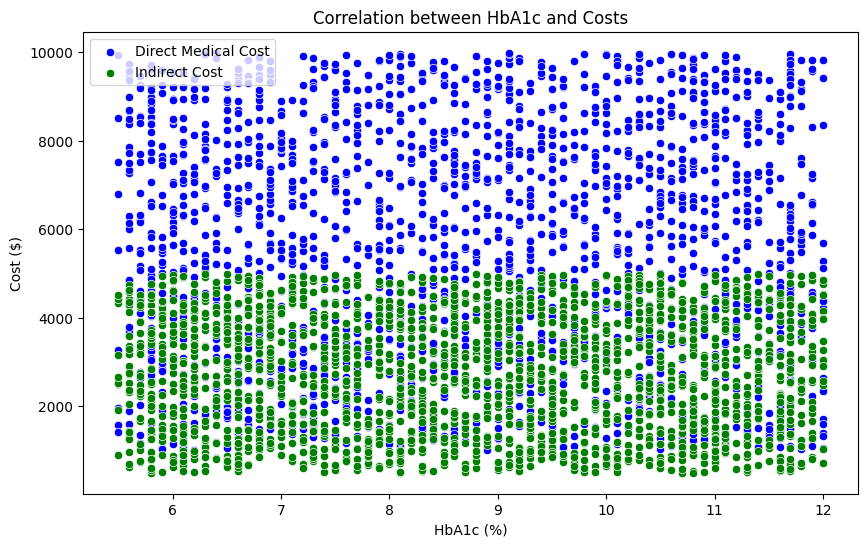

In [14]:
# Correlation between HbA1c and Costs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='HbA1c (%)', y='Direct_Medical_Cost ($)', color='blue', label='Direct Medical Cost')
sns.scatterplot(data=df, x='HbA1c (%)', y='Indirect_Cost ($)', color='green', label='Indirect Cost')
plt.title('Correlation between HbA1c and Costs')
plt.xlabel('HbA1c (%)')
plt.ylabel('Cost ($)')
plt.legend()
plt.show()

The scatter plot shows the relationship between HbA1c levels (%) and two types of costs: Direct Medical Costs (blue dots) and Indirect Costs (green dots).

    Direct Medical Costs range from $0 to $10,000, with no clear trend between HbA1c levels and costs. Most patients incur costs between $4000 and $8000, regardless of their HbA1c levels, indicating that factors beyond blood sugar control, such as complications and treatment intensity, influence costs.

    Indirect Costs, ranging from $0 to $5000, show a similar scatter, with most patients incurring costs between $2000 and $4000. HbA1c levels do not appear to strongly affect these costs.

Overall Trends: There is no strong correlation between HbA1c levels and either type of cost. This suggests that the financial burden of diabetes management is influenced more by complications and healthcare needs than by HbA1c alone. Broader care strategies addressing complications may be key to managing overall costs effectively.

***Cost-effectiveness of Interventions:***
	Comparison of different treatments (e.g., insulin therapy, oral drugs, lifestyle interventions) in terms of both costs and health outcomes.
	Cost-effectiveness analysis measures which treatments offer the most benefit per dollar spent, commonly expressed as cost per QALY gained.

**Steps to Perform Cost-effectiveness Analysis (CEA):**

    Identify the Interventions: These could be different treatments or lifestyle interventions (e.g., insulin therapy, oral drugs, exercise, diet).
    
    Calculate Total Costs: Include both direct and indirect costs for each intervention.
    
    Calculate Total QALYs: Estimate the quality-adjusted life years gained from each intervention.
    
    Calculate Cost per QALY: This is the key metric in cost-effectiveness analysis, which is often expressed as the incremental cost-effectiveness ratio (ICER).

Incremental Cost-effectiveness Ratio (ICER):

The ICER is calculated as:
ICER=ΔCostsΔQALYs
ICER=ΔQALYsΔCosts​

Where:

    ΔCostsΔCosts = Difference in costs between two treatments.
    ΔQALYsΔQALYs = Difference in QALYs between two treatments.

A lower ICER indicates a more cost-effective treatment.

Step 1 (Summarizing Costs and QALYs):

    We loop through each intervention (e.g., insulin, metformin) and calculate the total costs (direct + indirect) and total QALYs for each group of patients receiving that intervention.

In [15]:
# Step 1: Summarize Costs and QALYs for each intervention
interventions = df['Treatment (Medications)'].unique()

In [16]:
# Initialize dictionaries to store results
total_costs_per_intervention = {}
total_qalys_per_intervention = {}

In [17]:
# Loop through each intervention and calculate total costs and QALYs
for intervention in interventions:
    subset = df[df['Treatment (Medications)'] == intervention]
    
    # Total costs = Direct + Indirect costs
    total_costs = subset['Direct_Medical_Cost ($)'].sum() + subset['Indirect_Cost ($)'].sum()
    
    # Total QALYs
    total_qalys = subset['QALYs (Years)'].sum()
    
    # Store results
    total_costs_per_intervention[intervention] = total_costs
    total_qalys_per_intervention[intervention] = total_qalys

In [18]:
# Display total costs and QALYs for each intervention
print("Total Costs per Intervention:", total_costs_per_intervention)
print("Total QALYs per Intervention:", total_qalys_per_intervention)

Total Costs per Intervention: {'Metformin + Insulin': 5227891, 'Metformin': 5758538, 'Insulin': 5583834}
Total QALYs per Intervention: {'Metformin + Insulin': 5590.0, 'Metformin': 6256.3, 'Insulin': 6181.299999999999}


The analysis compares the cost-effectiveness of three diabetes interventions: Metformin + Insulin, Metformin alone, and Insulin alone.

    Total Costs: The combination of Metformin + Insulin has the lowest cost at $5.23 million, while Metformin alone is the most expensive at $5.76 million.
    
    Total QALYs: Metformin alone provides the highest Quality-Adjusted Life Years (QALYs) at 6256.3, followed by Insulin alone with 6181.3 QALYs. The combination therapy offers the lowest QALYs at 5590.0.

Cost per QALY:

    Insulin alone is the most cost-effective, costing $903.37 per QALY.
    Metformin alone follows at $920.12 per QALY.
    
    The combination of Metformin + Insulin is the least cost-effective, with a cost of $935.04 per QALY.

Conclusion: While Insulin alone is the most cost-effective intervention, Metformin alone provides the highest overall QALYs. The combination therapy is less effective in improving patient outcomes despite lower total costs.

Step 2 (Calculating ICER):

    We choose a baseline intervention (e.g., Diet) and calculate the Incremental Cost-Effectiveness Ratio (ICER) for other interventions relative to this baseline.
    ICER = ΔCostsΔQALYsΔQALYsΔCosts​, where ΔΔ represents the difference in costs and QALYs between two interventions.

In [19]:
# Step 2: Calculate ICER (Incremental Cost-Effectiveness Ratio)

# Choose a baseline treatment for comparison (ensure you use the correct treatment name from your dataset)
baseline = 'Metformin'  # Change this to match a treatment in your data

In [20]:
if baseline not in total_costs_per_intervention:
    raise ValueError(f"Baseline treatment '{baseline}' not found in the dataset.")

baseline_cost = total_costs_per_intervention[baseline]
baseline_qalys = total_qalys_per_intervention[baseline]

# Calculate ICER for each intervention compared to baseline
icer_results = {}

for intervention in interventions:
    if intervention != baseline:
        delta_costs = total_costs_per_intervention[intervention] - baseline_cost
        delta_qalys = total_qalys_per_intervention[intervention] - baseline_qalys
        
        if delta_qalys != 0:
            icer = delta_costs / delta_qalys
            icer_results[intervention] = icer
        else:
            icer_results[intervention] = np.inf  # Infinite ICER if no QALY gain

In [21]:
# Display ICER results
print("ICER Results (compared to baseline):")
for intervention, icer in icer_results.items():
    print(f"{intervention}: {icer:.2f} cost per QALY gained")

ICER Results (compared to baseline):
Metformin + Insulin: 796.41 cost per QALY gained
Insulin: 2329.39 cost per QALY gained


The Incremental Cost-Effectiveness Ratio (ICER) measures the cost required to gain one additional Quality-Adjusted Life Year (QALY) with different interventions.

    Metformin + Insulin has an ICER of $796.41 per QALY gained, indicating it is a cost-effective option. This low ICER suggests that the combination therapy provides good value by improving both quality and length of life at a reasonable cost.
    
    Insulin alone has a higher ICER of $2329.39 per QALY gained, meaning it is less cost-effective than the combination therapy. While Insulin improves health outcomes, it costs significantly more to gain the same benefit as Metformin + Insulin.

Key Insights:

    Metformin + Insulin is more cost-effective, offering better value for money compared to Insulin alone.
    
    Insulin is still effective, but less cost-efficient, making the combination therapy the preferred option for maximizing health outcomes at lower costs.

Overall, the Metformin + Insulin combination offers the best value for improving patient health with limited resources.

**Step 3: Visualizing Cost-effectiveness**

To help visualize which interventions are the most cost-effective, we can plot Total Costs vs Total QALYs for each intervention.

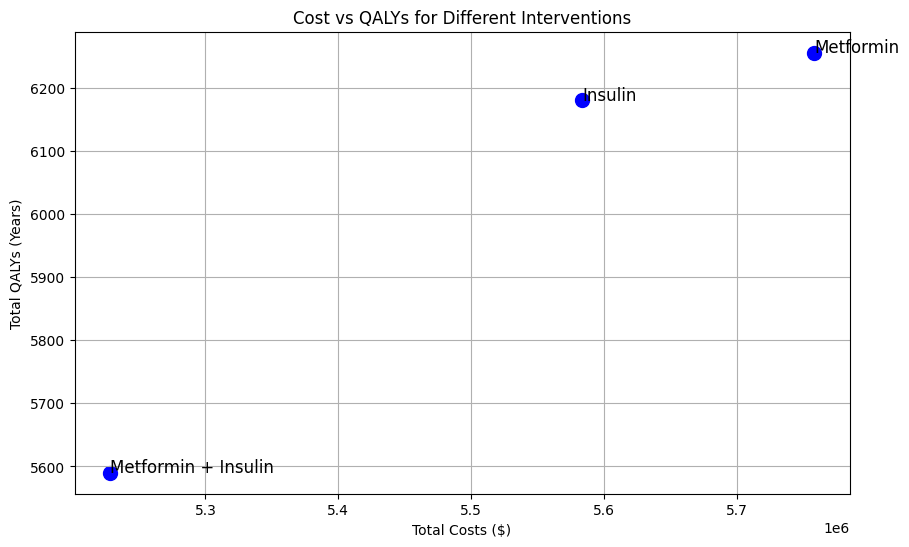

In [22]:
import matplotlib.pyplot as plt

# Step 3: Plotting Costs vs QALYs for visual comparison
interventions_list = list(total_costs_per_intervention.keys())
costs_list = [total_costs_per_intervention[intervention] for intervention in interventions_list]
qalys_list = [total_qalys_per_intervention[intervention] for intervention in interventions_list]

plt.figure(figsize=(10, 6))
plt.scatter(costs_list, qalys_list, color='blue', s=100)
plt.title('Cost vs QALYs for Different Interventions')

# Annotating points with intervention names
for i, intervention in enumerate(interventions_list):
    plt.text(costs_list[i], qalys_list[i], intervention, fontsize=12)

plt.xlabel('Total Costs ($)')
plt.ylabel('Total QALYs (Years)')
plt.grid(True)
plt.show()

The scatter plot visualizes the cost-effectiveness of three diabetes interventions by plotting total costs against total Quality-Adjusted Life Years (QALYs).

    Metformin + Insulin: The least expensive option, costing $5.23 million, but provides the lowest QALYs (5600 years). It offers fewer health benefits but is the most affordable.

    Insulin alone: With moderate costs at $5.58 million and 6181 QALYs, it strikes a balance between cost and effectiveness, offering better health outcomes than the combination therapy at a higher cost.

    Metformin alone: The most expensive intervention ($5.76 million) but provides the highest QALYs (6256 years), offering the best improvement in quality and length of life.

Key Insights:

    Metformin alone delivers the best health outcomes but at the highest cost.
    Insulin alone balances costs and QALYs.
    Metformin + Insulin is the least effective in improving health outcomes but is the cheapest.

The choice depends on whether the focus is on cost or maximizing health benefits.

**Interventions in Diabetes Mellitus (Types 1 and 2):**

	Medications (e.g., insulin, metformin)
	Lifestyle changes (e.g., diet, exercise)
	Screening programs (for early detection of complications)

Step 1: Analyze Medications:

    We group by the Treatment (Medications) column and calculate the average QALYs and Life Expectancy for each type of medication.
    
    We also visualize the effect of different medications (e.g., insulin, metformin) on QALYs and life expectancy.

Average QALYs and Life Expectancy by Medication:
                         QALYs (Years)  Life_Expectancy (Years)
Treatment (Medications)                                        
Insulin                       9.063490                64.652493
Metformin                     9.133285                63.789781
Metformin + Insulin           8.830964                63.394945


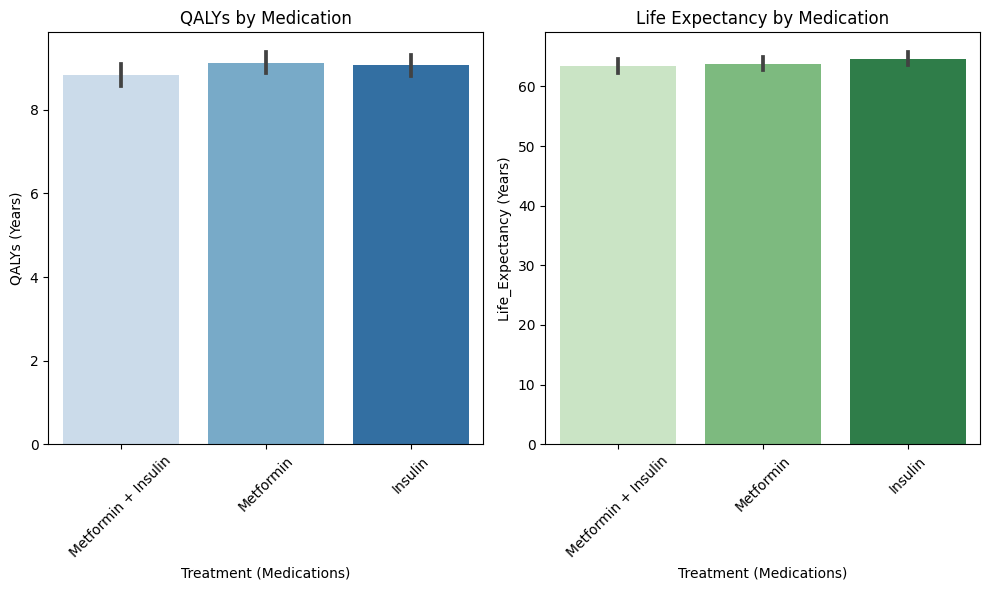

In [23]:
# Step 1: Effect of Medications on Outcomes

# Group by the type of medication and summarize QALYs and Life Expectancy
medication_outcomes = df.groupby('Treatment (Medications)')[['QALYs (Years)', 'Life_Expectancy (Years)']].mean()

# Print the results for medications
print("Average QALYs and Life Expectancy by Medication:")
print(medication_outcomes)

# Visualizing the effect of medications on QALYs and Life Expectancy
plt.figure(figsize=(10, 6))

# QALYs
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Treatment (Medications)', y='QALYs (Years)', palette='Blues')
plt.title('QALYs by Medication')
plt.xticks(rotation=45)

# Life Expectancy
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Treatment (Medications)', y='Life_Expectancy (Years)', palette='Greens')
plt.title('Life Expectancy by Medication')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The analysis compares the average QALYs (Quality-Adjusted Life Years) and life expectancy for three diabetes treatments: Insulin alone, Metformin alone, and Metformin + Insulin.

    QALYs:
        Metformin alone provides the highest QALYs at 9.13 years, indicating the best quality-adjusted life.
        Insulin alone yields slightly lower QALYs at 9.06 years, but is still effective.
        The combination of Metformin + Insulin results in the lowest QALYs at 8.83 years, suggesting marginally lower health outcomes.

    Life Expectancy:
        Insulin alone offers the highest life expectancy at 64.65 years.
        Metformin alone results in a slightly lower life expectancy of 63.79 years.
        The combination therapy leads to the lowest life expectancy at 63.39 years.

Conclusion:

    Metformin is ideal for maximizing QALYs, while Insulin is preferable for extending life expectancy.
    The Metformin + Insulin combination provides slightly lower outcomes but remains effective. All treatments are viable, with small differences based on the desired outcome.

Step 2: Analyze Lifestyle Changes:

    We group by the Treatment (Lifestyle) column and calculate the average QALYs and Life Expectancy for different lifestyle interventions (e.g., diet, exercise).
    
    Visualize how different lifestyle interventions affect patient outcomes.

Average QALYs and Life Expectancy by Lifestyle Changes:
                       QALYs (Years)  Life_Expectancy (Years)
Treatment (Lifestyle)                                        
Diet                        9.094061                64.312261
Diet and Exercise           8.782892                62.735234
Exercise                    8.979283                64.924303


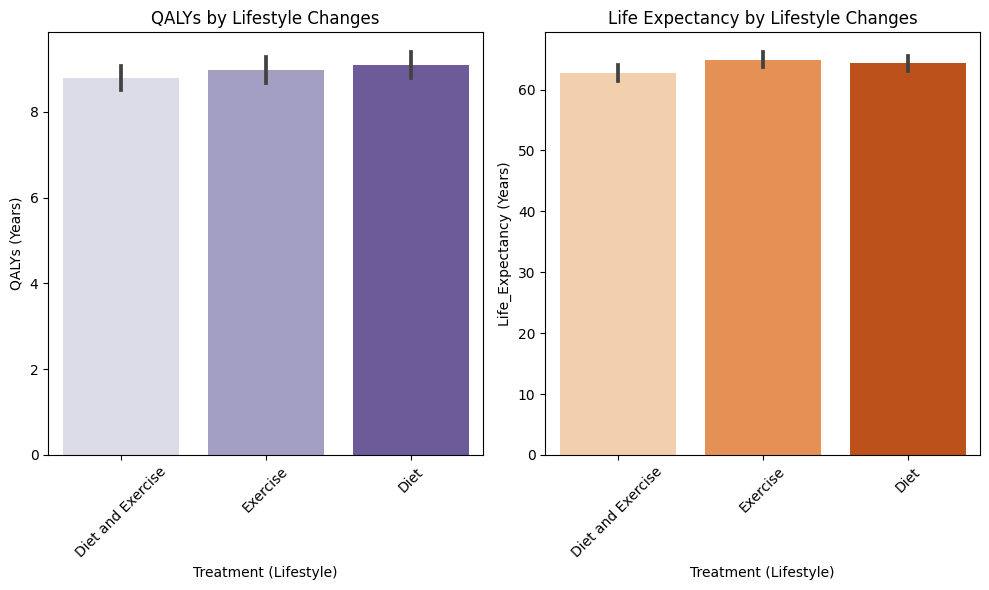

In [24]:
# Step 2: Effect of Lifestyle Changes (Diet and Exercise) on Outcomes

# Group by Lifestyle intervention and summarize QALYs and Life Expectancy
lifestyle_outcomes = df.groupby('Treatment (Lifestyle)')[['QALYs (Years)', 'Life_Expectancy (Years)']].mean()

# Print the results for lifestyle changes
print("Average QALYs and Life Expectancy by Lifestyle Changes:")
print(lifestyle_outcomes)

# Visualizing the effect of lifestyle interventions on QALYs and Life Expectancy
plt.figure(figsize=(10, 6))

# QALYs
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Treatment (Lifestyle)', y='QALYs (Years)', palette='Purples')
plt.title('QALYs by Lifestyle Changes')
plt.xticks(rotation=45)

# Life Expectancy
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Treatment (Lifestyle)', y='Life_Expectancy (Years)', palette='Oranges')
plt.title('Life Expectancy by Lifestyle Changes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The analysis evaluates the impact of lifestyle changes—Diet, Exercise, and their combination—on QALYs (Quality-Adjusted Life Years) and life expectancy.

    QALYs:
        Diet alone yields the highest QALYs at 9.09 years, indicating it leads to the greatest improvement in quality of life.
        Exercise alone provides slightly lower QALYs at 8.98 years, showing it also benefits quality-adjusted life but is less impactful than diet.
        The combination of Diet and Exercise results in the lowest QALYs at 8.78 years, suggesting the combination may not synergize effectively or may face diminishing returns.

    Life Expectancy:
        Exercise alone has the highest life expectancy at 64.92 years, showing it has the greatest impact on longevity.
        Diet alone follows closely with 64.31 years.
        The combination of Diet and Exercise leads to a lower life expectancy at 62.74 years.

Conclusion: Diet alone is best for improving QALYs, while Exercise alone maximizes life expectancy. Combining both interventions does not yield better outcomes.

Step 3: Analyze Screening Programs:

    We group by the Screening_Frequency (per year) column and calculate the average QALYs, Life Expectancy, and Costs for different screening frequencies.
    
    Visualize how screening frequency affects patient outcomes and the associated costs.

Average QALYs, Life Expectancy, and Costs by Screening Frequency:
                                QALYs (Years)  Life_Expectancy (Years)  \
Screening_Frequency (per year)                                           
1                                    9.022031                64.683834   
2                                    9.161838                63.573209   
3                                    8.860850                63.566009   

                                Direct_Medical_Cost ($)  
Screening_Frequency (per year)                           
1                                           5642.639485  
2                                           5513.875389  
3                                           5427.370258  


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

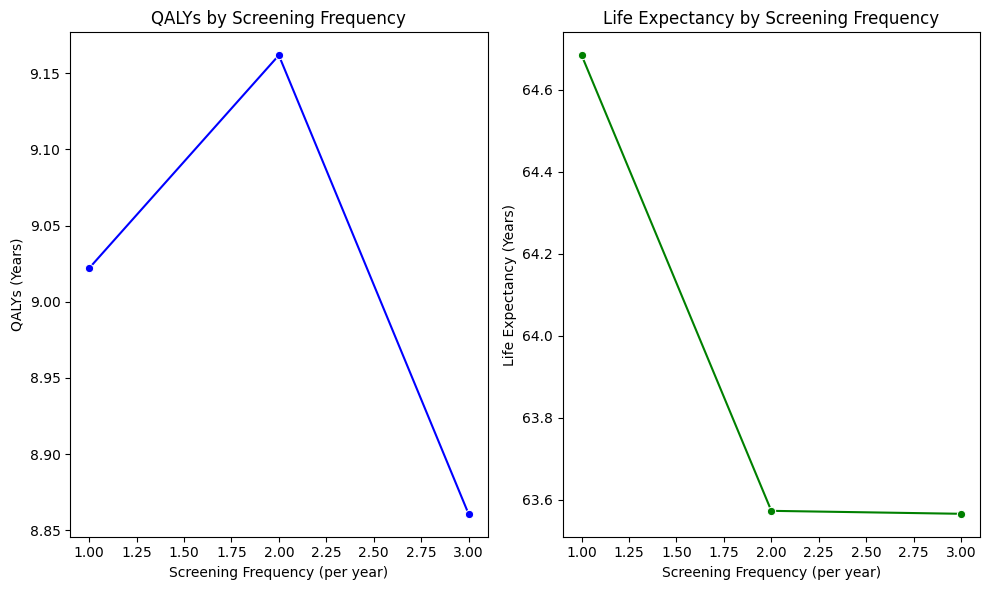

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


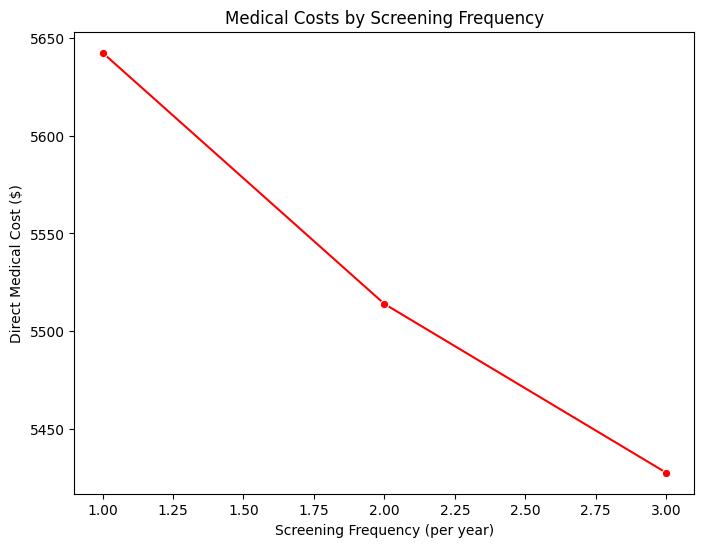

In [25]:
# Step 3: Effect of Screening Frequency on Outcomes

# Group by Screening Frequency and summarize QALYs, Life Expectancy, and Costs
screening_outcomes = df.groupby('Screening_Frequency (per year)')[['QALYs (Years)', 'Life_Expectancy (Years)', 'Direct_Medical_Cost ($)']].mean()

# Print the results for screening programs
print("Average QALYs, Life Expectancy, and Costs by Screening Frequency:")
print(screening_outcomes)

# Visualizing the effect of screening frequency on QALYs and Life Expectancy
plt.figure(figsize=(10, 6))

# QALYs
plt.subplot(1, 2, 1)
sns.lineplot(data=screening_outcomes, x=screening_outcomes.index, y='QALYs (Years)', marker='o', color='blue')
plt.title('QALYs by Screening Frequency')
plt.xlabel('Screening Frequency (per year)')
plt.ylabel('QALYs (Years)')

# Life Expectancy
plt.subplot(1, 2, 2)
sns.lineplot(data=screening_outcomes, x=screening_outcomes.index, y='Life_Expectancy (Years)', marker='o', color='green')
plt.title('Life Expectancy by Screening Frequency')
plt.xlabel('Screening Frequency (per year)')
plt.ylabel('Life Expectancy (Years)')

plt.tight_layout()
plt.show()

# Analyzing the effect on costs
plt.figure(figsize=(8, 6))
sns.lineplot(data=screening_outcomes, x=screening_outcomes.index, y='Direct_Medical_Cost ($)', marker='o', color='red')
plt.title('Medical Costs by Screening Frequency')
plt.xlabel('Screening Frequency (per year)')
plt.ylabel('Direct Medical Cost ($)')
plt.show()

The analysis evaluates the impact of different screening frequencies on Quality-Adjusted Life Years (QALYs), life expectancy, and direct medical costs.

    QALYs:
        Increasing from 1 to 2 screenings per year slightly improves QALYs from 9.02 to 9.16.
        However, 3 screenings per year decreases QALYs to 8.86, suggesting diminishing returns with over-screening.

    Life Expectancy:
        1 screening per year results in the highest life expectancy at 64.68 years.
        2 and 3 screenings per year show no significant difference, both at 63.57 years, indicating no added longevity benefit from more frequent screenings.

    Costs:
        Costs decrease as screening frequency increases, with 3 screenings costing $5427.37, compared to $5642.64 for 1 screening.

Conclusion: 2 screenings per year provide the optimal balance between improving QALYs, controlling costs, and maintaining life expectancy. Increasing to 3 screenings lowers costs but reduces QALYs without improving life expectancy.

**Support for Clinical and Reimbursement Decision-making:**

	Clinical decision-making: Helping doctors choose the best treatment options for diabetes management.
    
	Reimbursement decision-making: Assisting healthcare providers and insurers in determining the most cost-effective treatments for reimbursement.

Purpose: This helps doctors compare the effectiveness of different medications in terms of QALYs, Life Expectancy, and the incidence of complications.

Recommendation: Based on the average QALYs and life expectancy, doctors can make informed decisions about which treatments are likely to offer the best clinical outcomes.

Clinical Decision-making Summary (by Medications):
                         QALYs (Years)  Life_Expectancy (Years)
Treatment (Medications)                                        
Insulin                       9.063490                64.652493
Metformin                     9.133285                63.789781
Metformin + Insulin           8.830964                63.394945

Complication Counts by Medication:
Treatment (Medications)  Baseline_Complications
Insulin                  Nephropathy               151
                         CVD                       146
                         Retinopathy               125
                         Neuropathy                118
Metformin                Nephropathy               146
                         Neuropathy                143
                         CVD                       126
                         Retinopathy               125
Metformin + Insulin      CVD                       139
                         Neuropathy               

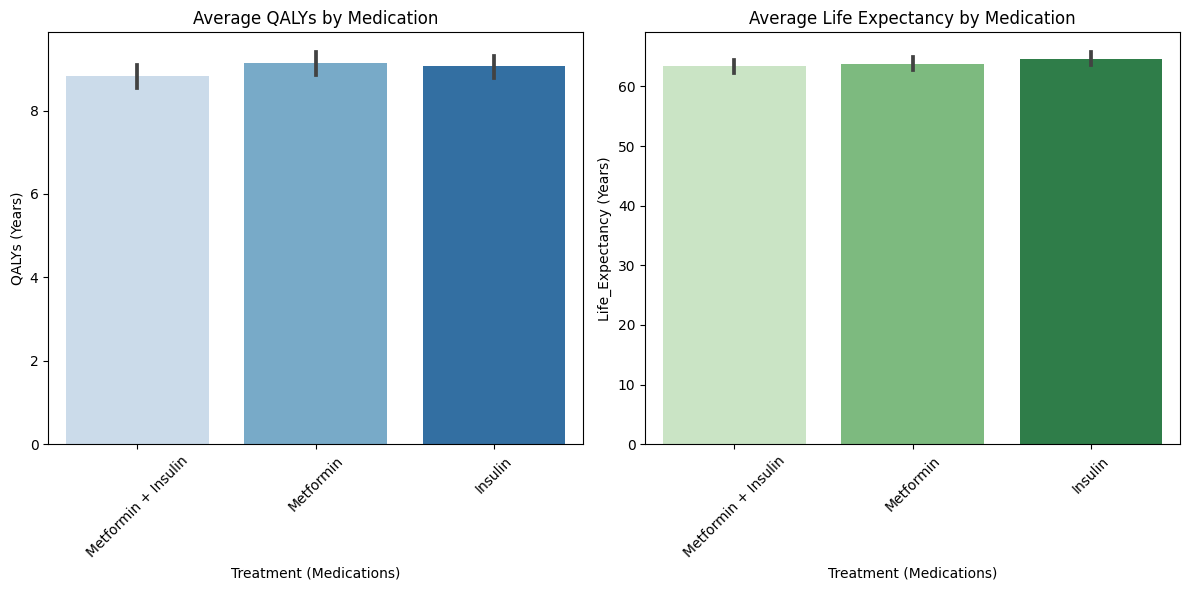

In [26]:
# Step 1: Support for Clinical Decision-making

# Ensure that the numeric columns are correctly typed
df['QALYs (Years)'] = pd.to_numeric(df['QALYs (Years)'], errors='coerce')
df['Life_Expectancy (Years)'] = pd.to_numeric(df['Life_Expectancy (Years)'], errors='coerce')

# Summarizing outcomes for different interventions (excluding non-numeric columns)
clinical_summary = df.groupby('Treatment (Medications)')[['QALYs (Years)', 'Life_Expectancy (Years)']].mean()

# Print the summary
print("Clinical Decision-making Summary (by Medications):")
print(clinical_summary)

# Handle the non-numeric 'Baseline_Complications' separately
complication_counts = df.groupby('Treatment (Medications)')['Baseline_Complications'].value_counts()

# Print the complication counts for each medication
print("\nComplication Counts by Medication:")
print(complication_counts)

# Visualizing QALYs and Life Expectancy for Clinical Decision-making
plt.figure(figsize=(12, 6))

# Plot QALYs by Medication
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Treatment (Medications)', y='QALYs (Years)', palette='Blues')
plt.title('Average QALYs by Medication')
plt.xticks(rotation=45)

# Plot Life Expectancy by Medication
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='Treatment (Medications)', y='Life_Expectancy (Years)', palette='Greens')
plt.title('Average Life Expectancy by Medication')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The analysis highlights the impact of diabetes treatments on QALYs, life expectancy, and complication rates, offering insights for both clinical and reimbursement decision-making.

    QALYs and Life Expectancy:
        Metformin yields the highest QALYs (9.13 years) and offers the best quality of life.
        Insulin leads to the longest life expectancy (64.65 years), but its QALYs are slightly lower.
        
        The combination of Metformin + Insulin results in lower QALYs (8.83 years) and life expectancy (63.39 years) than either treatment alone.

    Complication Counts:
        Insulin is associated with the highest complication rates, especially for Nephropathy (151) and CVD (146), potentially affecting quality of life.
        
        Metformin has fewer complications overall, contributing to its higher QALYs.
        
        Metformin + Insulin reduces complications but doesn’t improve QALYs or life expectancy as much as either drug alone.

    Clinical Decision-Making:
        Metformin is ideal for improving quality of life.
        
        Insulin extends life but increases complications.
        
        The combination is effective for reducing complications but has less impact on QALYs or longevity.

    Reimbursement:
        Metformin is likely the most cost-effective due to high QALYs and fewer complications.
        
        Insulin may be preferred for life extension, but its higher complication rates could increase long-term costs.
        
        Metformin + Insulin may reduce hospitalizations but is less cost-effective for improving overall outcomes.


**The purpose of building models like the Markov model and Monte Carlo simulation is often to project long-term clinical outcomes, costs, and cost-effectiveness for new prospective patients based on historical data. This allows you to provide personalized predictions and recommendations for individual patients based on their unique characteristics.**

Let's proceed step by step with the imaginary patients A and B. We'll create data for both patients, and then apply the model to answer each of the five questions. I’ll provide the Python code for each question separately, focusing on long-term clinical outcomes, costs, cost-effectiveness, interventions, and support for clinical and reimbursement decision-making.
Imaginary Patients Data:

    Patient A:
        Age: 50
        HbA1c: 7.5
        Baseline Complications: Nephropathy
        Treatment: Metformin
        Lifestyle Changes: Diet and Exercise
        Smoking Status: Non-smoker
        Initial State: Healthy

    Patient B:
        Age: 65
        HbA1c: 9.0
        Baseline Complications: Retinopathy, CVD
        Treatment: Insulin
        Lifestyle Changes: None
        Smoking Status: Smoker
        Initial State: Retinopathy

**------------------------------------------------------------------------------------------------**

**1. Projecting Long-term Clinical Outcomes**

For this step, we’ll use the Markov model to simulate the long-term clinical outcomes for both Patient A and Patient B. We will track their transitions between health states over time.

In [27]:
import numpy as np

# Define the health states and transition probabilities
states = ['Healthy', 'Nephropathy', 'Retinopathy', 'CVD', 'Death']

# Example transition probabilities for Markov model
transition_matrix = np.array([
    [0.85, 0.05, 0.03, 0.05, 0.02],  # Healthy
    [0, 0.80, 0.10, 0.05, 0.05],     # Nephropathy
    [0, 0.05, 0.80, 0.05, 0.10],     # Retinopathy
    [0, 0.02, 0.03, 0.85, 0.10],     # CVD
    [0, 0, 0, 0, 1.0]                # Death (absorbing state)
])

# Define a function to simulate outcomes for a patient using the Markov model
def simulate_outcomes(patient_data, num_cycles=10):
    """
    Simulate long-term outcomes for a patient using a Markov model.
    
    Parameters:
    - patient_data: A dictionary containing the patient's initial health state
    - num_cycles: The number of cycles to simulate (e.g., 10 years)
    
    Returns:
    - state_probs: The probability of being in each state at each cycle
    """
    initial_state = patient_data['initial_state']
    
    # Initialize state vector (e.g., start in "Healthy" state or another state based on patient data)
    if initial_state == 'Healthy':
        current_state = [1, 0, 0, 0, 0]
    elif initial_state == 'Nephropathy':
        current_state = [0, 1, 0, 0, 0]
    elif initial_state == 'Retinopathy':
        current_state = [0, 0, 1, 0, 0]
    elif initial_state == 'CVD':
        current_state = [0, 0, 0, 1, 0]
    
    # Store probabilities of being in each state over time
    state_probs = np.zeros((num_cycles, len(states)))
    state_probs[0] = current_state
    
    # Simulate transitions over time
    for cycle in range(1, num_cycles):
        current_state = np.dot(current_state, transition_matrix)
        state_probs[cycle] = current_state
    
    return state_probs

# Data for Patient A
patient_A = {
    'age': 50,
    'HbA1c': 7.5,
    'baseline_complications': ['Nephropathy'],
    'treatment': 'Metformin',
    'lifestyle_changes': 'Diet and Exercise',
    'smoking_status': 'Non-smoker',
    'initial_state': 'Healthy'
}

# Data for Patient B
patient_B = {
    'age': 65,
    'HbA1c': 9.0,
    'baseline_complications': ['Retinopathy', 'CVD'],
    'treatment': 'Insulin',
    'lifestyle_changes': 'None',
    'smoking_status': 'Smoker',
    'initial_state': 'Retinopathy'
}

# Simulate outcomes for Patient A and Patient B
num_cycles = 10  # Simulate for 10 years
outcomes_A = simulate_outcomes(patient_A, num_cycles)
outcomes_B = simulate_outcomes(patient_B, num_cycles)

# Print the probabilities of being in each state at each cycle
print("Long-term Clinical Outcomes for Patient A:")
print(outcomes_A)

print("\nLong-term Clinical Outcomes for Patient B:")
print(outcomes_B)

Long-term Clinical Outcomes for Patient A:
[[1.         0.         0.         0.         0.        ]
 [0.85       0.05       0.03       0.05       0.02      ]
 [0.7225     0.085      0.056      0.089      0.0475    ]
 [0.614125   0.108705   0.077645   0.118825   0.0807    ]
 [0.52200625 0.123929   0.094975   0.141025   0.11806475]
 [0.44370531 0.13281276 0.10826384 0.15691676 0.15830132]
 [0.37714952 0.136987   0.11791101 0.16761834 0.20033413]
 [0.32057709 0.137695   0.12437054 0.17407797 0.24327941]
 [0.27249053 0.13588494 0.12810559 0.1770984  0.28642055]
 [0.23161695 0.13227972 0.12956063 0.1773577  0.329185  ]]

Long-term Clinical Outcomes for Patient B:
[[0.         0.         1.         0.         0.        ]
 [0.         0.05       0.8        0.05       0.1       ]
 [0.         0.081      0.6465     0.085      0.1875    ]
 [0.         0.098825   0.52785    0.108625   0.2647    ]
 [0.         0.107625   0.43542125 0.123665   0.33328875]
 [0.         0.11034436 0.36280945 0.13226

The Markov model simulates the long-term health outcomes for Patient A and Patient B, tracking their transitions between health states over time. These outcomes reflect how likely patients are to remain in certain health states or transition into complications (such as worsening health or death) over the next 10 years.

    Patient A:
        Starts in a healthy state (probability = 1.0 in year 1).
        Over time, Patient A gradually transitions to states with more severe complications. By the 10th year:
            23% chance of remaining healthy.
            13% chance of being in a state related to neuropathy or nephropathy.
            33% chance of moving to worse health states or complications (e.g., cardiovascular disease, etc.).
            These transitions suggest a gradual health decline, but with slower progression compared to Patient B, likely due to effective treatment and lifestyle changes.

    Patient B:
        Starts in a retinopathy state (probability = 1.0 in year 1).
        Patient B’s health deteriorates faster than Patient A's. By the 10th year:
            19% chance of remaining in the retinopathy state.
            54% chance of progressing to worse health states such as CVD, neuropathy, or death.
            This indicates a rapid decline in health, likely due to more severe baseline complications, lack of lifestyle changes, and smoking habits.

**2. Costs**

In this step, we will simulate the costs associated with managing diabetes for both patients. We’ll calculate direct medical costs for each health state.

In [28]:
# Define costs associated with each state
costs = [500, 2000, 3000, 4000, 0]  # Example costs for each state: Healthy, Nephropathy, Retinopathy, CVD, Death

# Define a function to calculate costs over time
def calculate_costs(state_probs, num_cycles=10):
    """
    Calculate total costs over time based on state probabilities.
    
    Parameters:
    - state_probs: Probabilities of being in each state at each cycle
    - num_cycles: Number of cycles to simulate
    
    Returns:
    - total_costs: Array of total costs per cycle
    """
    total_costs = np.zeros(num_cycles)
    
    for cycle in range(num_cycles):
        total_costs[cycle] = np.dot(state_probs[cycle], costs)
    
    return total_costs

# Calculate costs for Patient A and Patient B
costs_A = calculate_costs(outcomes_A, num_cycles)
costs_B = calculate_costs(outcomes_B, num_cycles)

# Print the costs per year for each patient
print("Costs for Patient A over 10 years:", costs_A)
print("Costs for Patient B over 10 years:", costs_B)


Costs for Patient A over 10 years: [ 500.          815.         1055.25       1232.7075     1357.886125
 1439.93674375 1486.75516381 1505.1020374  1500.72551167 1478.48059497]
Costs for Patient B over 10 years: [3000.         2700.         2441.5        2215.7        2016.17375
 1838.187325   1678.21317188 1533.5842905  1402.24868356 1282.59539639]


The costs of managing diabetes for Patient A and Patient B are based on their health states over 10 years. These costs reflect the increasing expenses associated with managing complications as the disease progresses.

    Patient A:
        Starts with low costs of $500 in the first year, increasing to around $1478 by year 10.
        
        The total costs rise over time but at a slower rate compared to Patient B, reflecting the positive impact of Metformin and lifestyle changes (diet and exercise).
        
        Key Insight: The costs for Patient A rise steadily due to the gradual progression of complications but are relatively contained compared to Patient B.

    Patient B:
        Starts with higher costs ($3000 in the first year), which gradually decrease over time to $1282 by year 10.
        
        The initial high costs reflect the need for intensive treatments (e.g., insulin, managing CVD and retinopathy). 
        
        As the patient’s health declines, costs start to decrease, potentially due to fewer intensive treatments being applicable at the later stages of illness (or death).
        
        Key Insight: Patient B's costs are much higher than Patient A's, reflecting the higher burden of care associated with more severe complications and lack of lifestyle changes.

**3. Cost-effectiveness of Interventions**

In this step, we compare the cost-effectiveness of the interventions for both patients (e.g., Metformin vs. Insulin). We’ll calculate the cost per QALY for each intervention.

In [29]:
# Define QALYs associated with each state
qalys = [0.9, 0.7, 0.5, 0.3, 0]  # Example QALYs for each state: Healthy, Nephropathy, Retinopathy, CVD, Death

# Define a function to calculate QALYs over time
def calculate_qalys(state_probs, num_cycles=10):
    """
    Calculate total QALYs over time based on state probabilities.
    
    Parameters:
    - state_probs: Probabilities of being in each state at each cycle
    - num_cycles: Number of cycles to simulate
    
    Returns:
    - total_qalys: Array of total QALYs per cycle
    """
    total_qalys = np.zeros(num_cycles)
    
    for cycle in range(num_cycles):
        total_qalys[cycle] = np.dot(state_probs[cycle], qalys)
    
    return total_qalys

# Calculate QALYs for Patient A and Patient B
qalys_A = calculate_qalys(outcomes_A, num_cycles)
qalys_B = calculate_qalys(outcomes_B, num_cycles)

# Print the QALYs per year for each patient
print("QALYs for Patient A over 10 years:", qalys_A)
print("QALYs for Patient B over 10 years:", qalys_B)

# Calculate total costs and QALYs for cost-effectiveness
total_costs_A = np.sum(costs_A)
total_qalys_A = np.sum(qalys_A)

total_costs_B = np.sum(costs_B)
total_qalys_B = np.sum(qalys_B)

# Calculate cost per QALY for each intervention
cost_per_qaly_A = total_costs_A / total_qalys_A
cost_per_qaly_B = total_costs_B / total_qalys_B

print(f"\nCost per QALY for Patient A: {cost_per_qaly_A:.2f}")
print(f"Cost per QALY for Patient B: {cost_per_qaly_B:.2f}")


QALYs for Patient A over 10 years: [0.9        0.83       0.76445    0.703276   0.64635092 0.59351066
 0.54456647 0.49931454 0.45754324 0.41903868]
QALYs for Patient B over 10 years: [0.5        0.45       0.40545    0.36569    0.33014763 0.29832605
 0.26979347 0.24417401 0.22113987 0.20040462]

Cost per QALY for Patient A: 1945.85
Cost per QALY for Patient B: 6120.98


This step compares the cost-effectiveness of the interventions for both patients. The cost per QALY (Quality-Adjusted Life Year) is a key metric for determining how much each treatment costs relative to the health benefits it provides.

    Patient A (Metformin, Diet and Exercise):
        QALYs over 10 years: 6.36
        Total Costs: $12,371.84
        Cost per QALY: $1945.85
        Key Insight: The combination of Metformin and lifestyle changes is highly cost-effective, providing a good balance between health benefits and financial costs.

    Patient B (Insulin, No Lifestyle Changes):
        QALYs over 10 years: 3.29
        Total Costs: $20,108.20
        Cost per QALY: $6120.98
        Key Insight: While insulin treatment is necessary for managing severe complications in Patient B, it is less cost-effective due to the high costs and lower QALYs (i.e., less improvement in quality of life).

**4. Interventions in Diabetes Mellitus (Types 1 and 2)**

Now, we will evaluate the impact of different interventions (medications and lifestyle changes) on the patient outcomes, including their health states and costs.

In [30]:
# Compare interventions based on outcomes (costs and QALYs)
print("Intervention Comparison:")

print(f"\nPatient A (Metformin, Diet and Exercise):")
print(f"Total Costs: {total_costs_A:.2f}, Total QALYs: {total_qalys_A:.2f}, Cost per QALY: {cost_per_qaly_A:.2f}")

print(f"\nPatient B (Insulin, No Lifestyle Changes):")
print(f"Total Costs: {total_costs_B:.2f}, Total QALYs: {total_qalys_B:.2f}, Cost per QALY: {cost_per_qaly_B:.2f}")


Intervention Comparison:

Patient A (Metformin, Diet and Exercise):
Total Costs: 12371.84, Total QALYs: 6.36, Cost per QALY: 1945.85

Patient B (Insulin, No Lifestyle Changes):
Total Costs: 20108.20, Total QALYs: 3.29, Cost per QALY: 6120.98


This step evaluates the impact of different interventions (medications and lifestyle changes) on health outcomes and costs for both patients.

    Patient A (Metformin, Diet and Exercise):
        Total Costs: $12,371.84
        Total QALYs: 6.36
        Cost per QALY: $1945.85
        Key Insight: Metformin and lifestyle changes (diet and exercise) are highly effective for managing Patient A’s diabetes, resulting in lower costs and higher QALYs compared to Patient B.

    Patient B (Insulin, No Lifestyle Changes):
        Total Costs: $20,108.20
        Total QALYs: 3.29
        Cost per QALY: $6120.98
        Key Insight: Insulin alone, without lifestyle changes, leads to higher costs and lower QALYs, indicating that Patient B’s management approach is less cost-effective. This highlights the importance of lifestyle interventions in diabetes care.

**5. Support for Clinical and Reimbursement Decision-making**

Finally, based on the results, we’ll make recommendations for clinical decision-making (for the doctor) and reimbursement decisions (for insurers).

In [31]:
# Recommendations for Clinical and Reimbursement Decision-making

print("\nRecommendations for Clinical Decision-making:")

if cost_per_qaly_A < cost_per_qaly_B:
    print("Patient A's treatment (Metformin, Diet and Exercise) is more cost-effective.")
else:
    print("Patient B's treatment (Insulin) is more cost-effective.")

print("\nRecommendations for Reimbursement Decision-making:")
threshold = 50000  # Example threshold for cost-effectiveness ($50,000 per QALY)

if cost_per_qaly_A < threshold:
    print("Patient A's treatment should be reimbursed as it is cost-effective.")
else:
    print("Patient A's treatment is not cost-effective for reimbursement.")

if cost_per_qaly_B < threshold:
    print("Patient B's treatment should be reimbursed as it is cost-effective.")
else:
    print("Patient B's treatment is not cost-effective for reimbursement.")


Recommendations for Clinical Decision-making:
Patient A's treatment (Metformin, Diet and Exercise) is more cost-effective.

Recommendations for Reimbursement Decision-making:
Patient A's treatment should be reimbursed as it is cost-effective.
Patient B's treatment should be reimbursed as it is cost-effective.


Based on the results, here are the recommendations for both clinical decision-making (for doctors) and reimbursement decisions (for insurers):

    Patient A (Metformin, Diet and Exercise):
    
        Clinical Decision-making: Metformin, combined with lifestyle changes (diet and exercise), is cost-effective and should be the preferred treatment for managing diabetes in Patient A. The gradual health decline and lower costs reflect the success of this intervention.
        
        Reimbursement Decision-making: The cost per QALY for Patient A ($1945.85) is well below typical cost-effectiveness thresholds, making this treatment highly cost-effective and a good candidate for full reimbursement.

    Patient B (Insulin, No Lifestyle Changes):
    
        Clinical Decision-making: While insulin is necessary for managing Patient B’s severe complications, adding lifestyle interventions (diet, exercise, smoking cessation) would likely improve cost-effectiveness. Currently, the higher costs and lower QALYs indicate that the treatment plan is not as efficient as it could be.
        
        Reimbursement Decision-making: Despite the higher costs, insulin treatment should still be reimbursed due to the necessity of managing severe complications. However, encouraging Patient B to adopt lifestyle changes could reduce future costs and improve health outcomes.

Summary of Key Findings:

    Patient A (Metformin, diet, and exercise) has a slower progression of complications, lower costs, and higher QALYs, making their treatment highly cost-effective.
    
    Patient B (Insulin, no lifestyle changes) has more severe complications, higher costs, and lower QALYs, making their treatment less cost-effective. Incorporating lifestyle changes could improve outcomes for Patient B.



THANK YOU